# Introduction to Data Mining - Project 2
ID: 1912360

Name: ANCHEARIN

### (문제) /data/boston.csv를 사용하여 아래와 같이 데이터를 탐색하고 요약하시오
**1)-1. 문제**  
데이터 셋에는 총 몇 개의 변수가 있고, 변수들의 이름은 어떻게 되며, 변수별로 결측값이 있는지 확인해보자. 

In [39]:
# code for 1)-1
import pandas as pd
from sklearn.datasets import load_boston
df=pd.read_csv('./Python-Data-Mining-Quick-Start-Guide/data/boston.csv')
df.index.name='record'
print(df.head())

cols=df.columns[1:]
for col in cols:
    print(col,df[col].isnull().values.any())


        record     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
record                                                                        
0            0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1            1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2            2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3            3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4            4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

        TAX  PTRATIO       B  LSTAT  MEDV  
record                                     
0       296     15.3  396.90   4.98  24.0  
1       242     17.8  396.90   9.14  21.6  
2       242     17.8  392.83   4.03  34.7  
3       222     18.7  394.63   2.94  33.4  
4       222     18.7  396.90   5.33  36.2  
CRIM False
ZN False
INDUS False
CHAS False
NOX False
RM False
AGE False
DIS False
RAD False
TAX False
PTRATIO False
B False
LSTAT False
ME

변수에는 ['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']가 있고, 각가의 변수에는 결측치가 없다

**1)-2. 문제**  
각 변수에 대해서 요약 통계량을 출력하시오.
어떤 변수의 변동이 가장 큰지, 어떤 변수가 치우쳐 있는지 요약 통계량을 바탕으로 설명하고, 치우쳐져 있는 변수 두 개를 선택하여 히스토그램을 나란히 그리고, 어떻게 치우쳐있는지 설명하시오 (변수는 정규화/표준화하지 않아도 된다.)

In [40]:
# code for 1)-2
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
record,506.0,252.500000,146.213884,0.00000,126.250000,252.50000,378.750000,505.0000
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647422,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


가장 변동이 크다는 것은 표준편차가 크다는 것을 의미하므로 std값이 가장 큰 TAX가 가장 변동이 큰 변수이다.

In [41]:
df.skew()

record     0.000000
CRIM       5.237578
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

skew()의 결과 가장 절대값이 큰 변수는 CRIM과 CHAS이다.

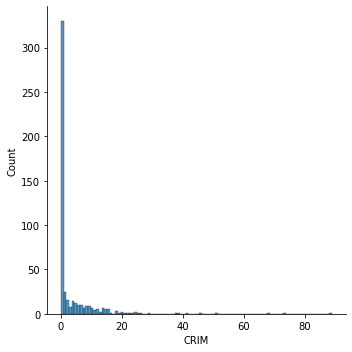

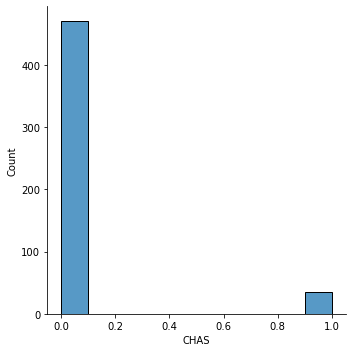

In [42]:
import seaborn as sns

sns.displot(df['CRIM'])
sns.displot(df['CHAS'])

CRIM과 CHAS를 각각 히스토그램으로 그려본 결과

CRIM은 Positively skewed이고, CHAS 역시 Positivley skewed이다.

**1)-3. 문제**  
모든 변수의 쌍의 상관계수를 구하고, heatmap을 이용하여 상관계수를 시각화하라.  
어떤 쌍이 가장 높은 상관관계를 나타내는지 heatmap을 근거로 찾으시오.

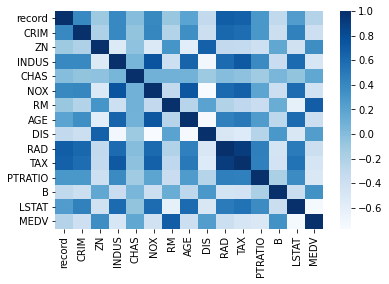

In [43]:
# code for 1)-3
import matplotlib.pyplot as plt
cor=df.corr()

sns.heatmap(cor,annot=False,cmap=plt.cm.Blues)
plt.show()

heatmap에서 RAD와 TAX가 만나는 곳이 색이 가장 진하므로 이 두 변수의 상관계수가 가장 크다는 것을 알 수 있다. 따라서 가장 높은 상관관계를 나타내는 변수의 쌍은 RAD-TAX이다.

**1)-4.문제**  
타깃 변수를 MEDV로 두었을 때, 타깃 변수에 대한 상관계수 값을 구하라.  

In [44]:
# code for 1)-4
cor_target=abs(cor['MEDV'])
print(cor_target)

record     0.226604
CRIM       0.385832
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


**1)-5. 문제**   
상관계수값이 가장 큰 변수를 선택하여 해당 변수와 타깃 변수간의 관계를 시각화하기 위해 스캐터 플롯을 그려보라. 각 변수의 의미와 스캐터 플롯, 그리고 1)-4의 상관계수값을 연관지어 두 변수의 관계를 설명하라. 
(변수의 의미는 https://scikit-learn.org/stable/datasets/toy_dataset.html를 참고)

<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>

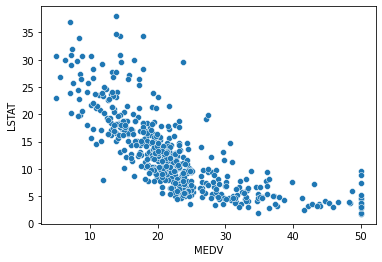

In [45]:
# code for 1)-5
sns.scatterplot(x='MEDV',y='LSTAT',data=df)

LSTAT : % lower status of the population

MEDV : Median value of owner-occupied homes in $1000’s

scatter plot을 보면 LSTAT과 MEDV는 음의 상관관계를 가진다.

LSTAT은 저소득층 주민 비율이고 MEDV는 주택가격이므로 저소득층이 증가하면 해당 지역의 주택가격이 하락하고 저소득층이 감소하면 해당 지역의 주택가격이 증가함을 알 수 있다.